In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Household energy bill data.csv')
df.head(2)

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_rooms           1000 non-null   int64  
 1   num_people          1000 non-null   int64  
 2   housearea           1000 non-null   float64
 3   is_ac               1000 non-null   int64  
 4   is_tv               1000 non-null   int64  
 5   is_flat             1000 non-null   int64  
 6   ave_monthly_income  1000 non-null   float64
 7   num_children        1000 non-null   int64  
 8   is_urban            1000 non-null   int64  
 9   amount_paid         1000 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 78.2 KB


In [4]:
df.describe()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.962000,4.897000,794.703420,0.376000,0.798000,0.477000,24684.986550,1.078000,0.608000,600.396359
std,1.030348,2.007591,147.771736,0.484622,0.401693,0.499721,9678.228224,0.934232,0.488441,181.406210
min,-1.000000,-1.000000,244.400000,0.000000,0.000000,0.000000,-1576.440000,0.000000,0.000000,87.851850
25%,1.000000,4.000000,691.037500,0.000000,1.000000,0.000000,18036.762500,0.000000,0.000000,475.065141
50%,2.000000,5.000000,789.970000,0.000000,1.000000,0.000000,24742.575000,1.000000,1.000000,598.331726
75%,3.000000,6.000000,892.955000,1.000000,1.000000,1.000000,31402.357500,2.000000,1.000000,729.930489
max,5.000000,11.000000,1189.120000,1.000000,1.000000,1.000000,56531.080000,4.000000,1.000000,1102.994109


<AxesSubplot: >

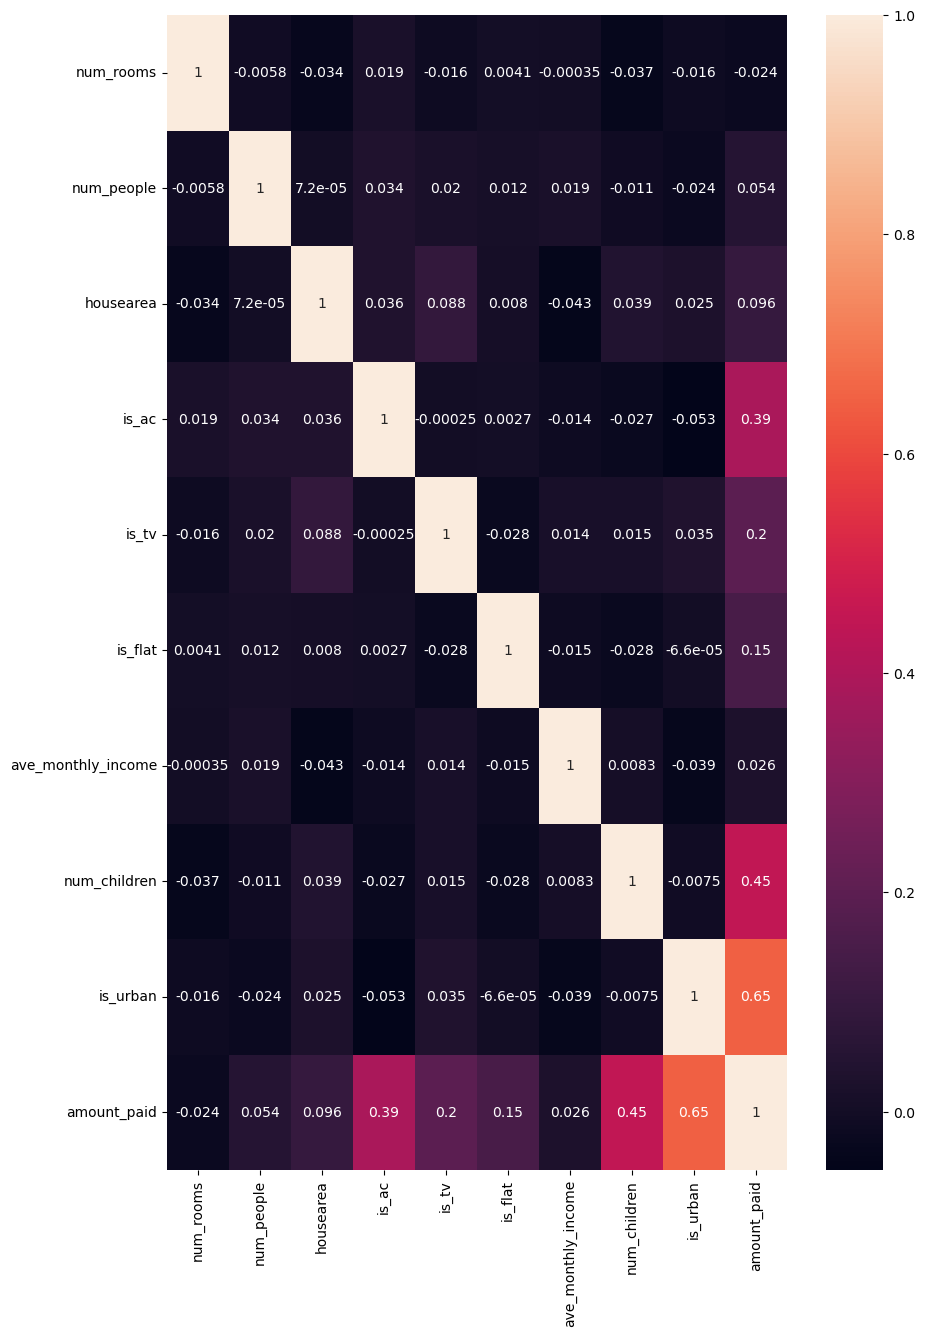

In [7]:
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(),annot=True)

In [8]:
df.columns

Index(['num_rooms', 'num_people', 'housearea', 'is_ac', 'is_tv', 'is_flat',
       'ave_monthly_income', 'num_children', 'is_urban', 'amount_paid'],
      dtype='object')

<AxesSubplot: xlabel='ave_monthly_income', ylabel='amount_paid'>

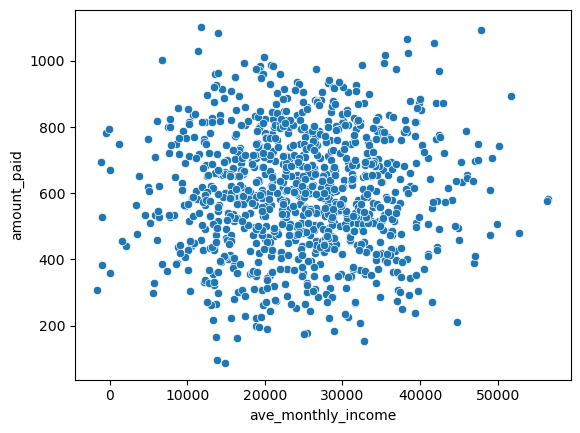

In [9]:
sns.scatterplot(x='ave_monthly_income',y='amount_paid',data=df)

In [14]:
df.isnull().sum().sum()

0

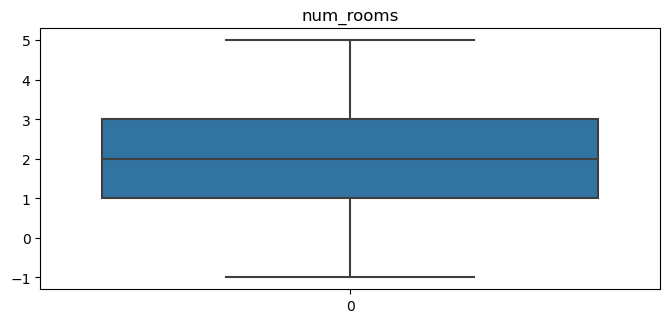

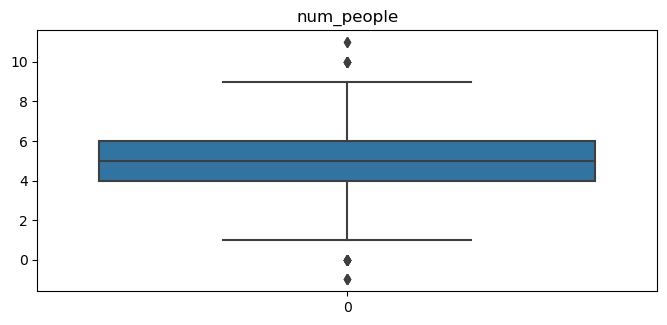

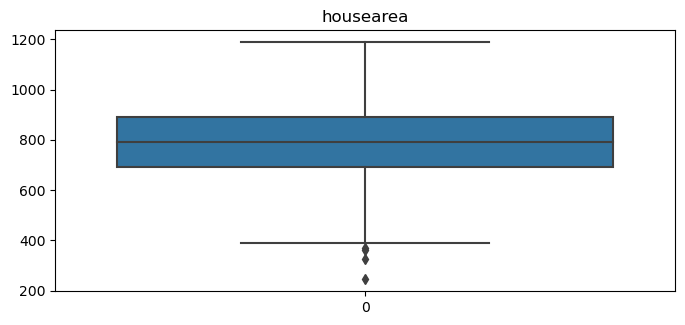

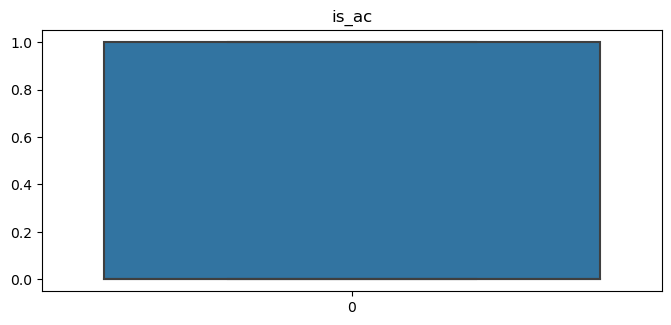

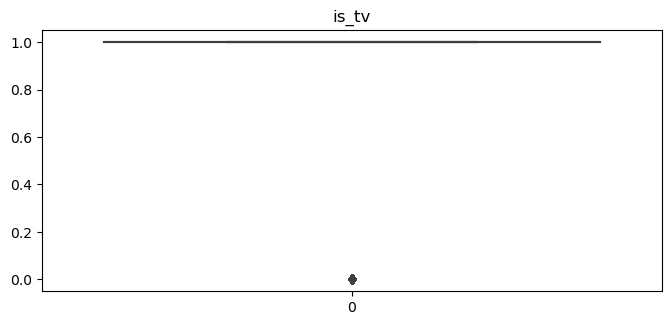

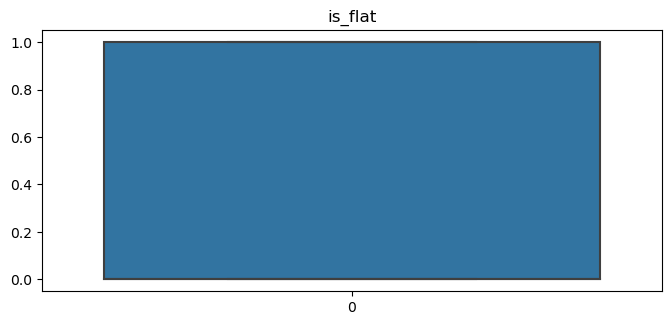

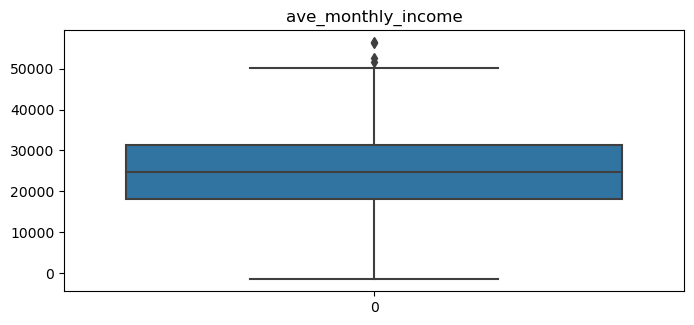

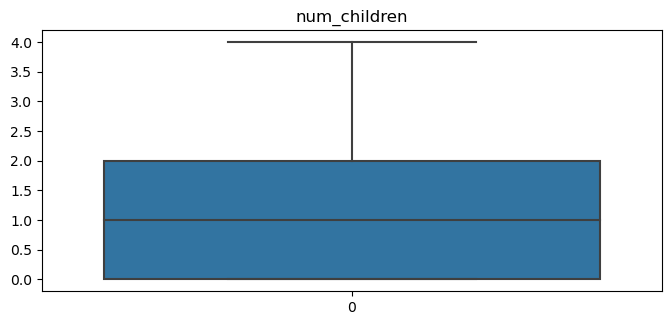

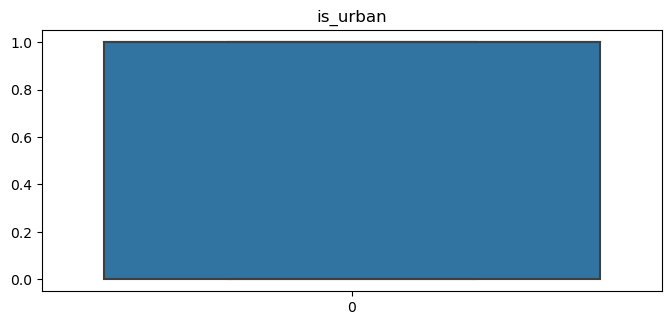

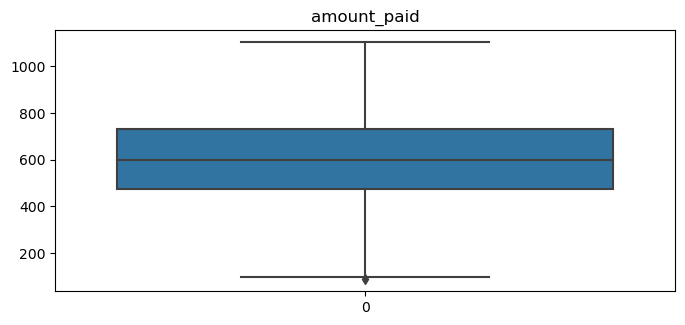

In [31]:
for i,j in enumerate(df.columns):
    plt.figure(figsize=(8,40))
    plt.subplot(10,1,i+1)
    plt.title(j)
    sns.boxplot(df[j])

In [34]:
df['is_tv'].value_counts()

1    798
0    202
Name: is_tv, dtype: int64

In [36]:
df.columns

Index(['num_rooms', 'num_people', 'housearea', 'is_ac', 'is_tv', 'is_flat',
       'ave_monthly_income', 'num_children', 'is_urban', 'amount_paid'],
      dtype='object')

In [37]:
x=df.iloc[:,:-1]
y=df.amount_paid

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.20)

In [39]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

<AxesSubplot: >

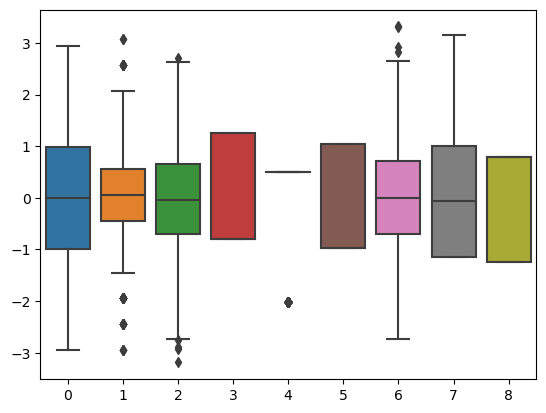

In [40]:
sns.boxplot(X_train_ss)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [70]:
model=[DecisionTreeRegressor(),SVR(),GradientBoostingRegressor(),RandomForestRegressor(),KNeighborsRegressor(),LinearRegression()]

In [71]:
for i in range(len(model)):
    lr=model[i]
    lr.fit(X_train_ss,y_train)
    y_pred=lr.predict(X_test_ss)
    print('r2score',r2_score(y_pred,y_test))
    print('rmse',np.sqrt(mean_squared_error(y_pred,y_test)))

r2score 0.7755201133304199
rmse 88.21431312957007
r2score -50.55869314553709
rmse 155.96026925347866
r2score 0.832560209413409
rmse 66.28690085200427
r2score 0.8268744117515151
rmse 68.7051268526484
r2score 0.7327740435121262
rmse 78.7312069014118
r2score 0.8529418866524896
rmse 62.74120324543183


In [78]:
df.head(3)

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157


In [79]:
a=df.iloc[:3,:-1]
a

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban
0,3,3,742.57,1,1,1,9675.93,2,0
1,1,5,952.99,0,1,0,35064.79,1,1
2,3,1,761.44,1,1,1,22292.44,0,0


In [80]:
a=ss.transform(a)
lr.predict(a)

array([653.8959494 , 639.35803147, 476.02750127])

In [81]:
import pickle as pkl

In [ ]:
pkl.dump(ss,open('scaling of elicticity bi'))